# Data Exploration and Cleaning:
    -  Univariable study of target and features (Continuous & Categorical features, separately)
    -  Multivariate study of target and features
    -  Testing the statistical assumptions: Normality, Homoscedasticity, etc.
    -  Basic cleaning: Outliers, Missing data, Duplicate values
    -  Chi-square test to examine dependency of target on categorical features (helpful for Feature Selection, if required)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Functions to detect & plot Outliers with different approaches:

def zscore_based_outliers(ys, threshold = 3):

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.abs(z_scores) > threshold

def mad_based_outlier(ys, thresh=3.5):
    median = np.median(ys, axis=0)
    mad=np.median(np.array([np.abs(y - median)  for y in ys]))
    modified_z_score=[0.6745 *(y - median) / mad for y in ys]
    return np.abs(modified_z_score) > thresh


def iqr_based_outliers(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = np.abs(quartile_3 - quartile_1)
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (ys > upper_bound) | (ys < lower_bound)

def plot_outliers(x):
    fig, axes = plt.subplots(nrows=3)
    fig.set_size_inches(6, 6)
    for ax, func in zip(axes, [zscore_based_outliers, mad_based_outlier, iqr_based_outliers]):
        sns.distplot(x, ax=ax, rug=True, hist=True)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    
    axes[0].set_title('Zscore-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('IQR-based Outliers', **kwargs)
    
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

In [4]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/Bank Marketing/bank data/bank-additional-full.csv', sep=';')

#df.drop('Loan_ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [28]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
L_cat=['poutcome', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
       'contact', 'month', 'day_of_week']
L_con=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed' ]

In [26]:
from sklearn.preprocessing import LabelEncoder

for c in L_cat and ['y']:
    scaler=LabelEncoder()
    df[c]=scaler.fit_transform(df[c])

In [27]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

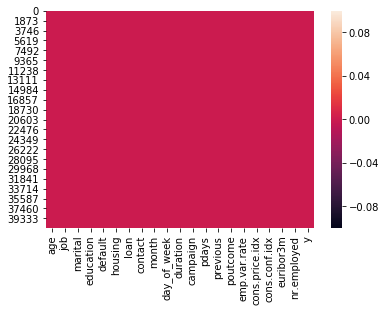

In [17]:
# To detect and see the Missing Values:
sns.heatmap(df.isnull())
df.isnull().sum()

In [7]:
df.dropna(axis=0, inplace=True)
df.shape

(597, 12)

In [8]:
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [9]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status' ]:
    encode_text_index(df, i)

In [10]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 613
Data columns (total 12 columns):
Gender               597 non-null int64
Married              597 non-null int64
Dependents           597 non-null int64
Education            597 non-null int64
Self_Employed        597 non-null int64
ApplicantIncome      597 non-null int64
CoapplicantIncome    597 non-null float64
LoanAmount           597 non-null float64
Loan_Amount_Term     597 non-null float64
Credit_History       597 non-null float64
Property_Area        597 non-null int64
Loan_Status          597 non-null int64
dtypes: float64(4), int64(8)
memory usage: 60.6 KB


In [12]:
# Imbalanced Data Set:
df["Loan_Status"].value_counts()

1    411
0    186
Name: Loan_Status, dtype: int64

______________________________________________________________________
variable name:  ApplicantIncome 

Statistical description: 
count      597.000000
mean      5429.254606
std       6183.461197
min        150.000000
25%       2876.000000
50%       3812.000000
75%       5815.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Skewness =  6.474492067511397
Kurtosis =  59.16990820412504


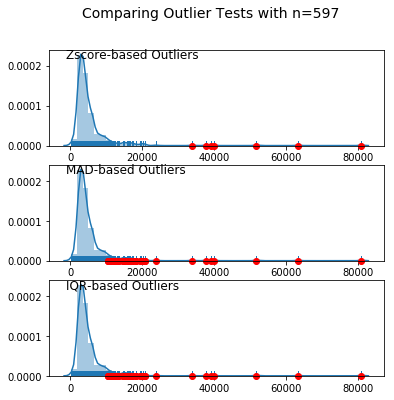

______________________________________________________________________
variable name:  CoapplicantIncome 

Statistical description: 
count      597.000000
mean      1625.545930
std       2955.936542
min          0.000000
25%          0.000000
50%       1210.000000
75%       2275.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

Skewness =  7.470387564656157
Kurtosis =  83.86122571545957


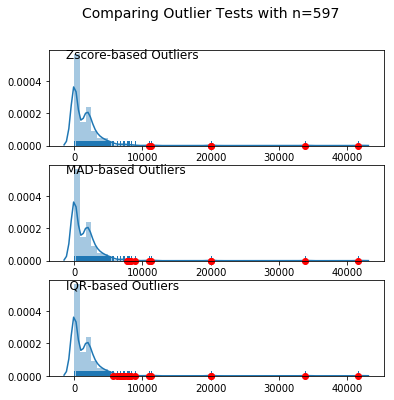

______________________________________________________________________
variable name:  LoanAmount 

Statistical description: 
count    597.000000
mean     147.078150
std       84.952401
min        9.000000
25%      102.000000
50%      130.000000
75%      165.000000
max      700.000000
Name: LoanAmount, dtype: float64

Skewness =  2.6951176391987763
Kurtosis =  10.601787363833925


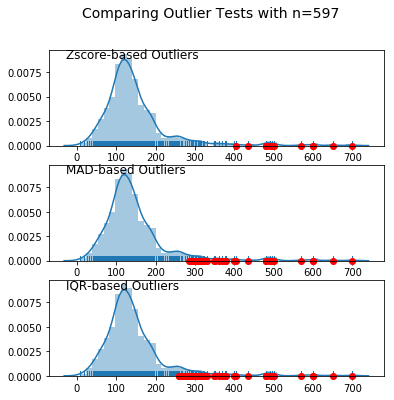

______________________________________________________________________
variable name:  Loan_Amount_Term 

Statistical description: 
count    597.000000
mean     341.909548
std       64.900325
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

Skewness =  -2.404072599096688
Kurtosis =  6.796917162005512


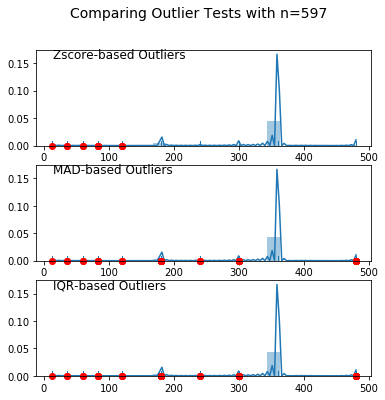

In [13]:
# Univariate analysis of Continuous Faetures: Statistical description (mean, std, skewness, Kurtosis) & Distribution plots
L=[]
for i in L_con:
    print('_'*70 )
    print('variable name: ', i, '\n')
    print('Statistical description: \n', df[i].describe(), '\n', sep='')
    if df[i].min()==0: 
        L.append(i)
    print("Skewness = ", df[i].skew())
    print("Kurtosis = ", df[i].kurt())
    
    plot_outliers(np.array(df[i]))
    plt.show()

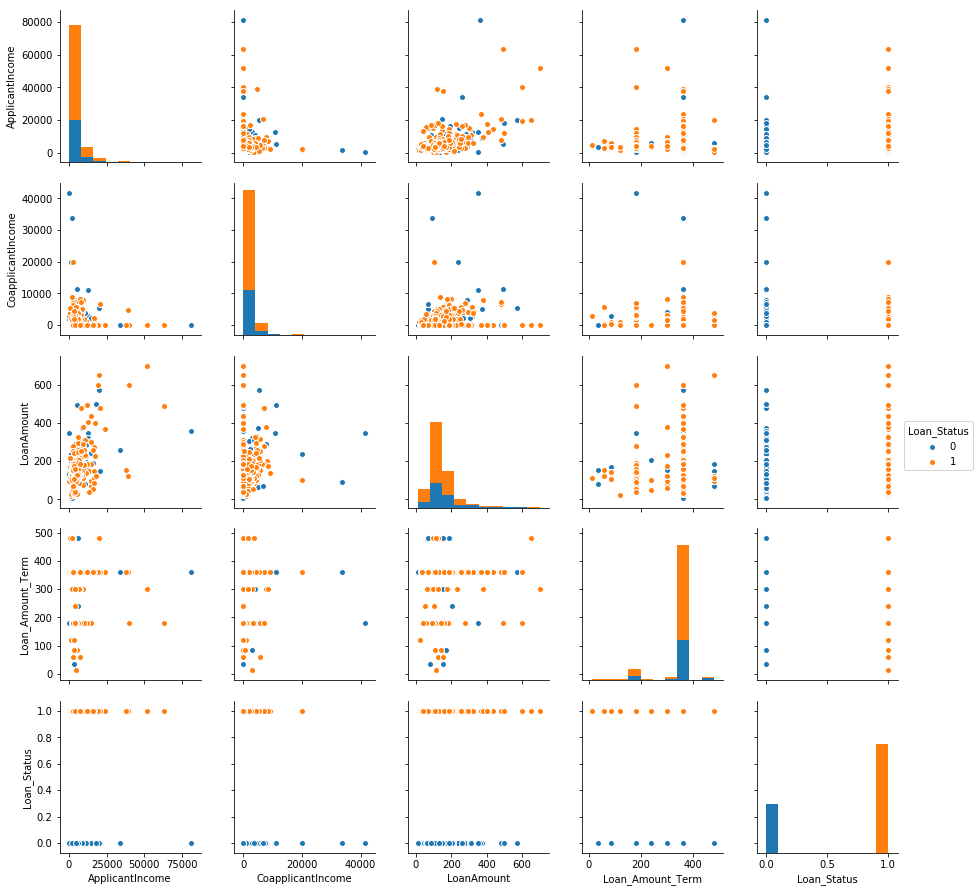

In [14]:
# Multi-variable analysis of Continuous Features: Pairplot of all continuous features for different classes of target 
sns.pairplot(pd.concat((df[L_con], df['Loan_Status']), axis=1 ), hue='Loan_Status')

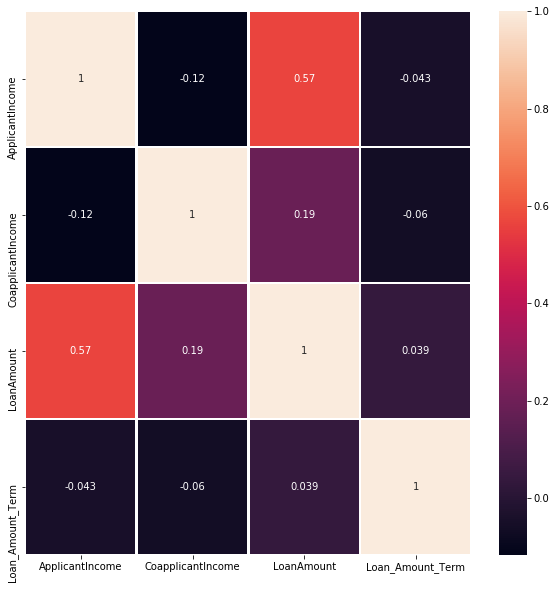

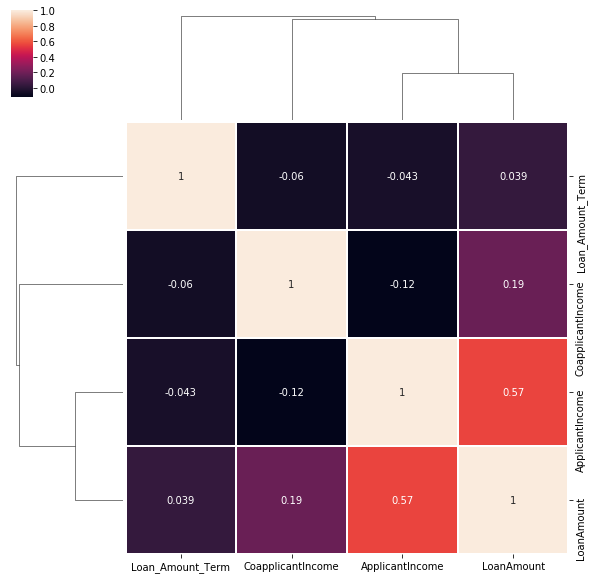

In [15]:
# Multivariable study: heatmap of correlation between continuous features
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df[L_con].corr(), annot=True, linewidths=1.5, ax=ax )

sns.clustermap(df[L_con].corr(), annot=True,  linewidths=1.5 )

______________________________________________________________________
variable name:  ApplicantIncome
z_statistic =  0.141
p_value =  0.888 

This feature is NOT significantly effective


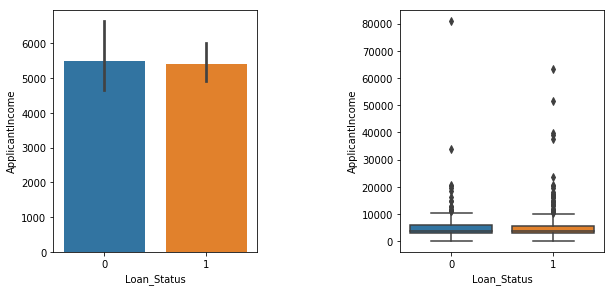

______________________________________________________________________
variable name:  CoapplicantIncome
z_statistic =  1.175
p_value =  0.241 

This feature is NOT significantly effective


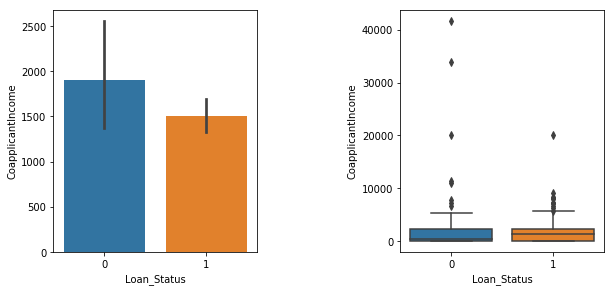

______________________________________________________________________
variable name:  LoanAmount
z_statistic =  1.007
p_value =  0.315 

This feature is NOT significantly effective


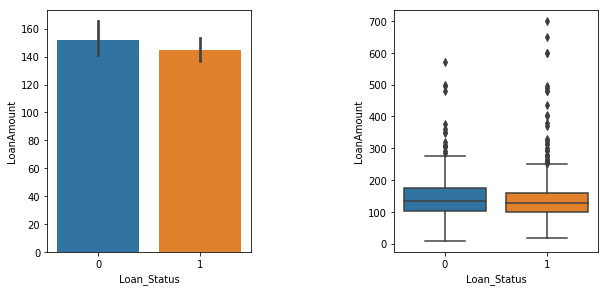

______________________________________________________________________
variable name:  Loan_Amount_Term
z_statistic =  0.526
p_value =  0.599 

This feature is NOT significantly effective


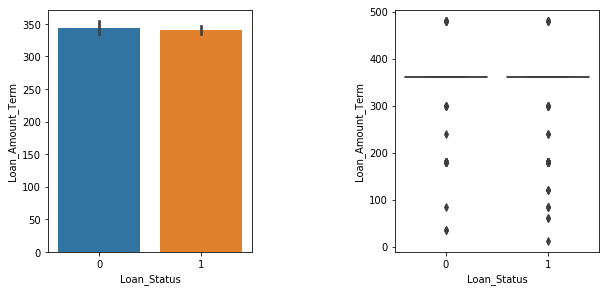

In [16]:
# Multivariable analysis of Contineous Features: 
for i in L_con:
    print('_'*70 )
    print('variable name: ', i)
    
    S0=df[df['Loan_Status']==0][i]
    S1=df[df['Loan_Status']==1][i]
    t_test=stats.ttest_ind(S0, S1, equal_var = False)
    print('z_statistic = ', round(t_test[0], 3))
    print('p_value = ', round(t_test[1], 3), '\n')
    if t_test[1]<=0.05:
        print('This feature is significantly effective')
    else:
        print('This feature is NOT significantly effective')
    
    fig = plt.figure(figsize=(9, 4))
    
    ax1 = fig.add_subplot(121)
    sns.barplot(x='Loan_Status', y=i, data=df)
    
    ax2 = fig.add_subplot(122)
    sns.boxplot( x="Loan_Status", y=i, data=df)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.7)
    
    plt.show()

______________________________________________________________________
variable name:  ApplicantIncome


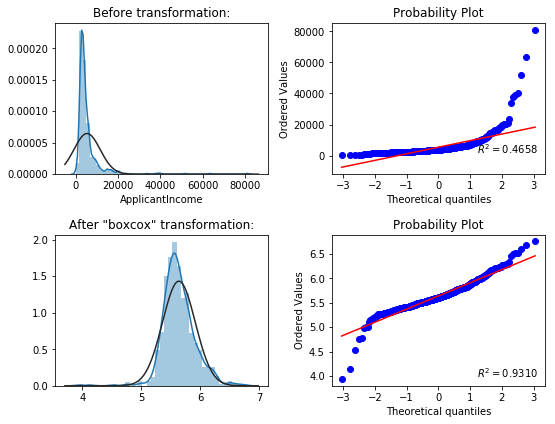

______________________________________________________________________
variable name:  CoapplicantIncome


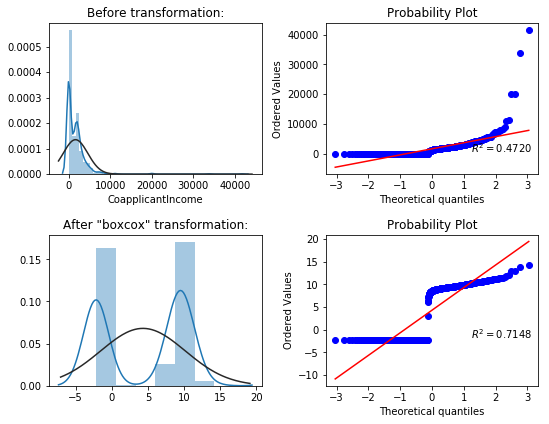

______________________________________________________________________
variable name:  LoanAmount


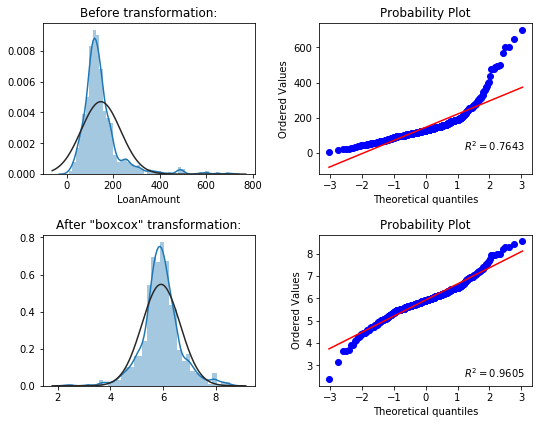

______________________________________________________________________
variable name:  Loan_Amount_Term


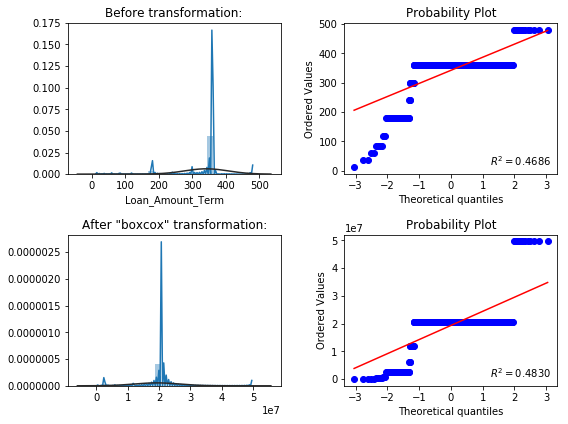

In [17]:
# To test the Statistical Assumptions on Continuous variables: We Check if our data meets the assumptions reuired by most mutivariate techniques _________
for i in L_con:
    print('_'*70 )
    print('variable name: ', i)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax1 = fig.add_subplot(221)
    ax1=sns.distplot(df[i], fit=stats.norm)
    ax1.set_title('Before transformation:')
    
    ax2 = fig.add_subplot(222)
    res=stats.probplot(df[i], plot=ax2, rvalue=True)
    
    b=0
    if i in L:
        b=0.1
    
    ax3 = fig.add_subplot(223)
    ax3=sns.distplot(stats.boxcox(b+df[i])[0], fit=stats.norm)
    ax3.set_title('After "boxcox" transformation:')
    
    ax4 = fig.add_subplot(224)
    res=stats.probplot(stats.boxcox(b+df[i])[0], dist=stats.norm, plot=ax4, rvalue=True)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)
    plt.show()

______________________________________________________________________
variable name:  Gender 

Value counts: 
1    489
0    108
Name: Gender, dtype: int64

Success rate for different values of this feature: 
 [[0.33333333 0.66666667]
 [0.30674847 0.69325153]]


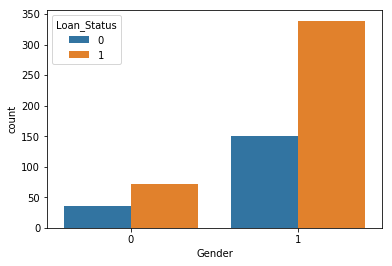

______________________________________________________________________
variable name:  Married 

Value counts: 
1    389
0    208
Name: Married, dtype: int64

Success rate for different values of this feature: 
 [[0.37019231 0.62980769]
 [0.28020566 0.71979434]]


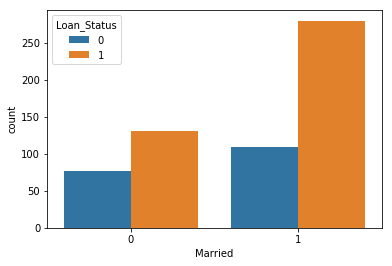

______________________________________________________________________
variable name:  Education 

Value counts: 
0    469
1    128
Name: Education, dtype: int64

Success rate for different values of this feature: 
 [[0.29211087 0.70788913]
 [0.3828125  0.6171875 ]]


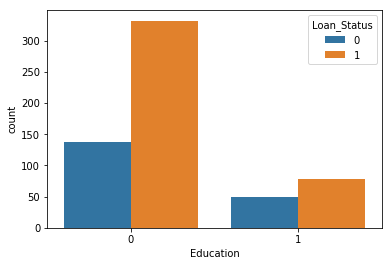

______________________________________________________________________
variable name:  Dependents 

Value counts: 
0    345
2    101
1    101
3     50
Name: Dependents, dtype: int64

Success rate for different values of this feature: 
 [[0.31594203 0.68405797]
 [0.34653465 0.65346535]]


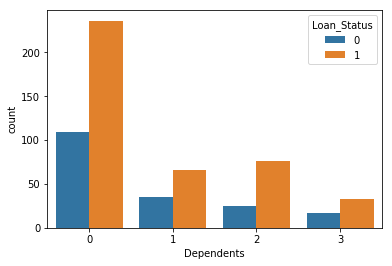

______________________________________________________________________
variable name:  Credit_History 

Value counts: 
1.0    514
0.0     83
Name: Credit_History, dtype: int64

Success rate for different values of this feature: 
 [[0.91566265 0.08433735]
 [0.21400778 0.78599222]]


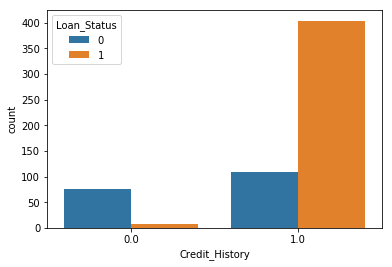

______________________________________________________________________
variable name:  Self_Employed 

Value counts: 
0    517
1     80
Name: Self_Employed, dtype: int64

Success rate for different values of this feature: 
 [[0.30947776 0.69052224]
 [0.325      0.675     ]]


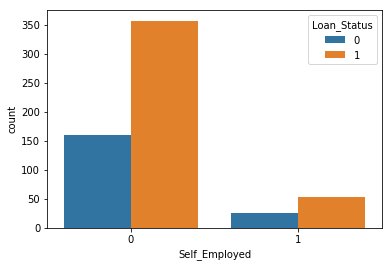

______________________________________________________________________
variable name:  Property_Area 

Value counts: 
1    228
2    194
0    175
Name: Property_Area, dtype: int64

Success rate for different values of this feature: 
 [[0.38285714 0.61714286]
 [0.23245614 0.76754386]]


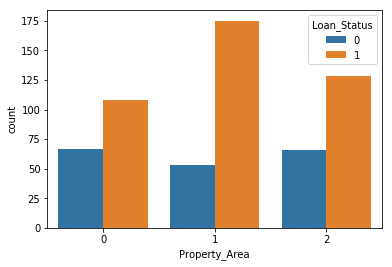

In [18]:
# Multivariate analysis of Categorical Features: Value Counts and Success rate for different classes of a Categorical feature

for i in ['Gender', 'Married', 'Education', 'Dependents', 'Credit_History', 'Self_Employed', 'Property_Area']:
    print('_'*70 )
    print('variable name: ', i, '\n')
    print('Value counts: \n', df[i].value_counts(), '\n', sep='')
    
    p00=df[(df[i]==0) & (df['Loan_Status']==0)]['Loan_Status'].count()/df[df[i]==0]['Loan_Status'].count()
    p01=df[(df[i]==0) & (df['Loan_Status']==1)]['Loan_Status'].count()/df[df[i]==0]['Loan_Status'].count()
    p10=df[(df[i]==1) & (df['Loan_Status']==0)]['Loan_Status'].count()/df[df[i]==1]['Loan_Status'].count()
    p11=df[(df[i]==1) & (df['Loan_Status']==1)]['Loan_Status'].count()/df[df[i]==1]['Loan_Status'].count()
    print('Success rate for different values of this feature: \n', np.array([[p00, p01], [p10, p11]]))
    
    sns.countplot(x=i,  hue="Loan_Status", data=df[L_cat])
    plt.show()

______________________________________________________________________
______________________________________________________________________
variable name:  Gender 

Chi-square statistic=  0.18071926194129215
p_value=  0.670755845515958


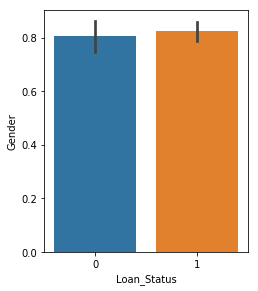

______________________________________________________________________
______________________________________________________________________
variable name:  Married 

Chi-square statistic=  4.705746387302597
p_value=  0.030061945648104542


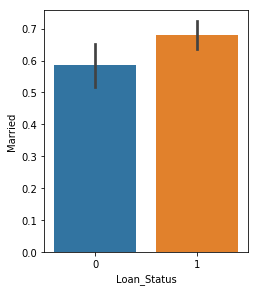

______________________________________________________________________
______________________________________________________________________
variable name:  Education 

Chi-square statistic=  3.4455670601964163
p_value=  0.06342165493032688


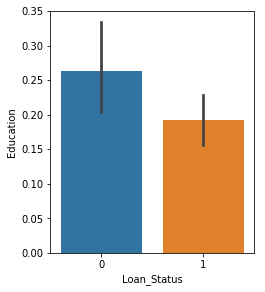

______________________________________________________________________
______________________________________________________________________
variable name:  Dependents 

Chi-square statistic=  2.7263059900343083
p_value=  0.435775361873291


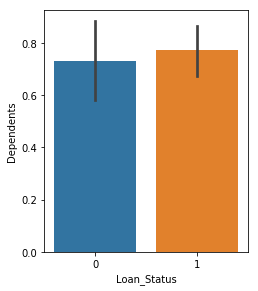

______________________________________________________________________
______________________________________________________________________
variable name:  Credit_History 

Chi-square statistic=  160.76920769518586
p_value=  7.684014276921888e-37


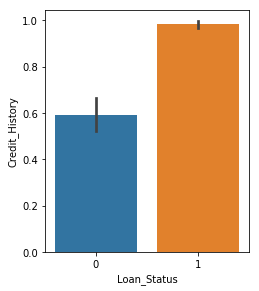

______________________________________________________________________
______________________________________________________________________
variable name:  Self_Employed 

Chi-square statistic=  0.022278837086731694
p_value=  0.8813477118528902


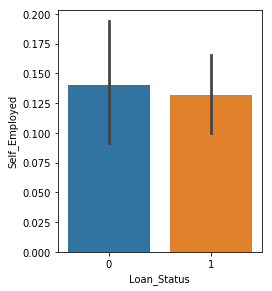

______________________________________________________________________
______________________________________________________________________
variable name:  Property_Area 

Chi-square statistic=  11.5411856142204
p_value=  0.0031179086477932066


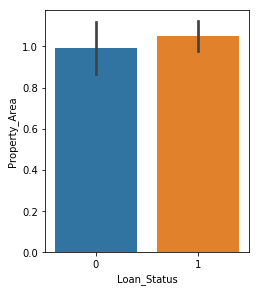

In [23]:

F={}
for c in ['Gender', 'Married', 'Education', 'Dependents', 'Credit_History', 'Self_Employed', 'Property_Area']:
    print('_'*70 )
    print('_'*70 )
    print('variable name: ', c, '\n')
    
    c0=df[df['Loan_Status']==0][c].value_counts().sort_index().values
    c1=df[df['Loan_Status']==1][c].value_counts().sort_index().values
    
    obs = np.array([c0, c1])
    g, p, dof, expctd = stats.chi2_contingency(obs)
    
    F[c] = round(g,2)
    print('Chi-square statistic= ', g)
    print('p_value= ', p)
    
    fig = plt.figure(figsize=(9, 4))
    
    ax1 = fig.add_subplot(121)
    sns.barplot(x='Loan_Status', y=c, data=df)

    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.7)
    
    plt.show()

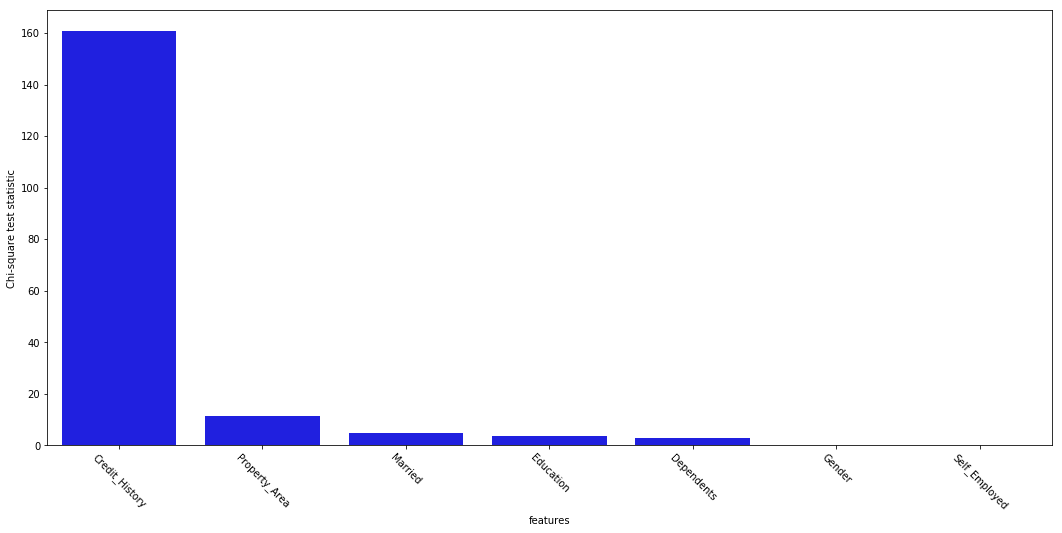

In [24]:
# Sort and plot Categorical Features based on their Chi-square statistics (i.e. their dependency with Target): 
# Helpful for Feature Selection
F_sorted=sorted(F,key=lambda i: F[i], reverse= True)
feature_df = pd.DataFrame([F[i] for i in F_sorted], index=[i for i in F_sorted]).reset_index()
feature_df.columns=['features', 'Chi-square test statistic']
fig, ax = plt.subplots(figsize=(18, 8)) 
sns.barplot(x='features', y='Chi-square test statistic', data=feature_df, color="blue", ax= ax)
plt.xticks(rotation=-45)

plt.show()